In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pio.templates.default = 'plotly_white'
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('Credit-Score-Data.csv')
df= df[:1000]
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      275
High_spent_Medium_value_payments    214
High_spent_Large_value_payments     145
Low_spent_Medium_value_payments     134
Low_spent_Large_value_payments      119
High_spent_Small_value_payments     113
Name: Payment_Behaviour, dtype: int64

In [ ]:
# def list_dict(col_name):
#     lst = list(set(df[f'{col_name}'].values))
#     dictionary ={}
#     j=0
#     for i in lst:
#         j+=1
#         dictionary[i]=j

#     return dictionary

In [ ]:
# col_name = 'Type_of_Loan'
# dictionary = list_dict(col_name)

In [ ]:
# print(dictionary)

In [ ]:
df['Credit_Score'].replace({'Good':3,'Standard':2,'Poor':1}, inplace=True)
df['Credit_Mix'].replace({'Good':2,'Standard':1,'Bad':1}, inplace=True)
# df['Occupation'].replace({'Teacher': 1, 'Entrepreneur': 2, 'Scientist': 3, 'Engineer': 4, 'Journalist': 5, 'Musician': 6, 'Architect': 7, 'Mechanic': 8, 'Media_Manager': 9, 'Accountant': 10, 'Developer': 11, 'Writer': 12, 'Doctor': 13, 'Lawyer': 14, 'Manager': 15}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1000 non-null   int64  
 1   Customer_ID               1000 non-null   int64  
 2   Month                     1000 non-null   int64  
 3   Name                      1000 non-null   object 
 4   Age                       1000 non-null   float64
 5   SSN                       1000 non-null   float64
 6   Occupation                1000 non-null   object 
 7   Annual_Income             1000 non-null   float64
 8   Monthly_Inhand_Salary     1000 non-null   float64
 9   Num_Bank_Accounts         1000 non-null   float64
 10  Num_Credit_Card           1000 non-null   float64
 11  Interest_Rate             1000 non-null   float64
 12  Num_of_Loan               1000 non-null   float64
 13  Type_of_Loan              1000 non-null   object 
 14  Delay_fro

In [ ]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6381.500000,25708.968000,4.500000,31.859000,5.180887e+08,52990.96872,4399.473993,5.587000,5.419000,14.512000,3.480000,21.700000,13.515000,10.448720,5.510000,1.288000,1494.994240,32.170609,230.29900,128.597478,59.786858,404.115891,1.957000
std,433.221573,13875.828302,2.292434,10.511975,2.812353e+08,37587.87720,3091.358989,2.655463,2.023743,9.008163,2.564406,16.286659,6.334343,6.472762,4.112276,0.453058,1216.924999,5.142146,104.15003,181.765481,48.791333,218.086064,0.686748
min,5634.000000,1908.000000,1.000000,14.000000,4.075839e+06,8701.54500,519.128750,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.520000,0.000000,1.000000,35.540000,21.744884,4.00000,0.000000,0.000000,7.129357,1.000000
25%,6007.750000,13914.000000,2.750000,22.000000,3.283363e+08,20186.02000,1828.240000,3.000000,4.000000,7.000000,1.000000,9.000000,8.000000,5.520000,2.000000,1.000000,585.050000,27.979514,153.00000,26.060348,28.458236,267.496258,1.000000
50%,6381.500000,25653.000000,4.500000,32.000000,5.384921e+08,39887.22000,3224.935000,6.000000,5.000000,12.000000,3.000000,17.000000,15.000000,9.220000,4.000000,1.000000,1154.460000,32.163236,230.00000,68.779909,43.315824,346.921711,2.000000
75%,6755.250000,39740.000000,6.250000,39.000000,7.551803e+08,73737.36000,6284.613333,8.000000,7.000000,19.000000,5.000000,28.000000,19.000000,14.780000,9.000000,2.000000,2174.160000,36.486123,321.00000,171.345560,77.266026,469.740557,2.000000
max,7129.000000,49323.000000,8.000000,56.000000,9.953789e+08,148699.32000,12432.610000,10.000000,10.000000,34.000000,9.000000,62.000000,25.000000,29.520000,17.000000,2.000000,4984.820000,46.194238,404.00000,1320.549063,237.918381,1180.066234,3.000000


In [ ]:
df.shape

(1000, 28)

C:\Users\athar\AppData\Local\Temp\ipykernel_17860\751875271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')


<AxesSubplot: >

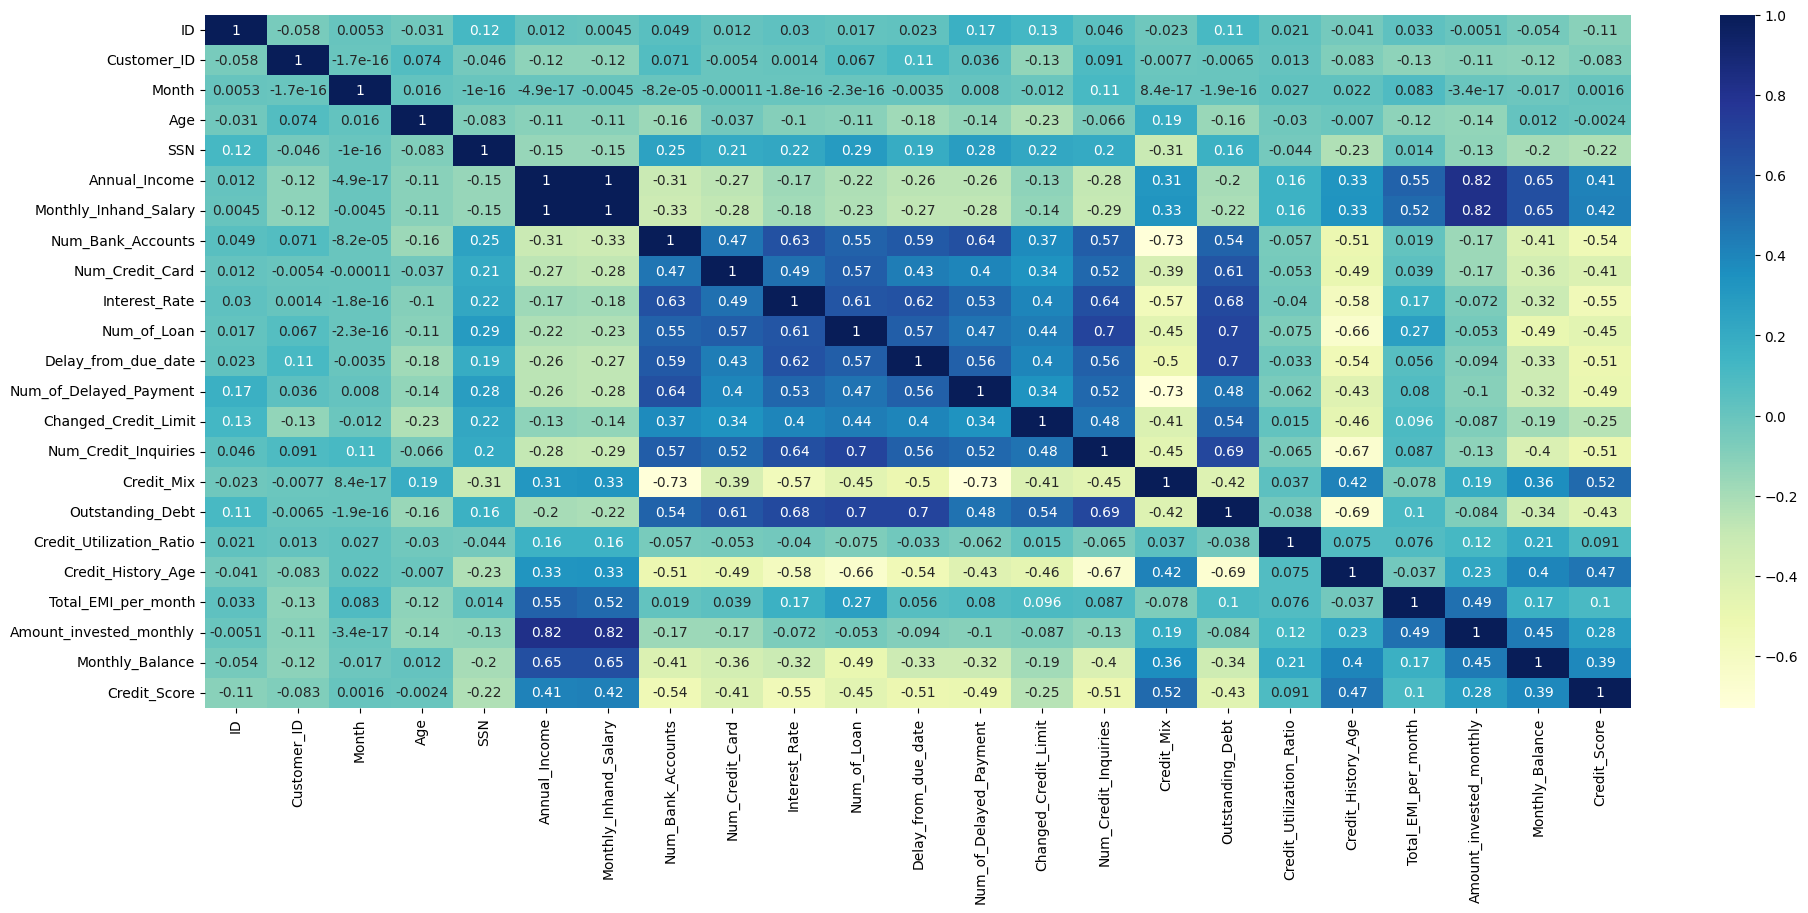

In [ ]:
plt.figure(figsize=(23,9))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [ ]:
x = np.array(df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.Credit_Score.value_counts()

2    527
1    258
3    215
Name: Credit_Score, dtype: int64

In [ ]:
print(min(df['Age'][:100]))
print(max(df['Age'][:100]))

21.0
55.0


In [ ]:
# df.Age.value_counts()

In [ ]:
# plt.figure(figsize=(23,9))
# plt.bar(df['Age'][:1000],df['Credit_Score'][:1000])
# plt.xlim(0)
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = np.array(df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
                   
y = np.array(df[['Credit_Score']])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain,ytrain)

C:\Users\athar\AppData\Local\Temp\ipykernel_17860\3199278788.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrain,ytrain)


RandomForestClassifier()

In [ ]:
features = np.array([[19114.12,1824.843333,2,2,9,2,12,3,3,250,200,310]])

In [ ]:
print(f'Predicted Credit Score category = {model.predict(features)}')

Predicted Credit Score category = [2]
